In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_epi_data(fileName, popData, requireNum= 80, start= 1):
    epiOData = np.genfromtxt(fileName, delimiter=',', skip_header= 0)[:, 1:]
    epiOData = epiOData[start:start+requireNum, :]
    print(epiOData.shape)
    epiODataNew= np.zeros((requireNum,epiOData.shape[1]))
    epiODataNew[requireNum-epiOData.shape[0]:, :]= epiOData.copy()
    epiOData = epiODataNew
    epiData= epiOData.copy()/popData[None, :]
    ranked_indices = np.argsort(epiOData[-1, :])
    return epiOData, epiData, ranked_indices
Epi= "covid" # sars, covid, H1N1
# Read the CSV file into a NumPy array
popData = np.genfromtxt('empirical_data/populations.csv', delimiter=',', skip_header= 0)#800,  china= 1
file_path = 'empirical_data/Country_Population_final.csv'
data = pd.read_csv(file_path)
popName= data["Country"].tolist()
epiODataSars, epiDataSars, ranked_indices_Sars= read_epi_data('empirical_data/infected_numbers_sars.csv', popData, requireNum= 80, start= 1)
epiODataH1N1, epiDataH1N1, ranked_indices_H1N1= read_epi_data('empirical_data/infected_numbers_H1N1.csv', popData,  requireNum= 80, start= 1)
epiODataCovid, epiDataCovid, ranked_indices_Covid= read_epi_data('empirical_data/infected_numbers_covid.csv', popData,  requireNum= 80, start=1)
ranked_pop= np.argsort(popData)

(80, 234)
(50, 234)
(80, 234)


93


Text(0, 0.5, 'Cumulative infected number')

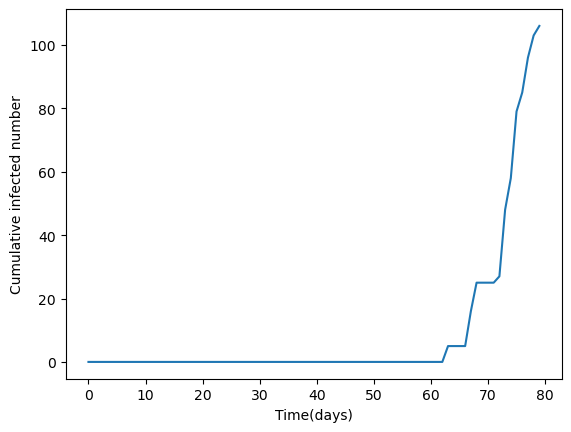

In [33]:
setCovid= set(ranked_indices_Covid[-78:])
setH1N1= set(ranked_indices_H1N1[-42:])
setSars= set(ranked_indices_Sars[-6:])

usedIdx= setCovid.union(setH1N1).union(setSars)

print(len(usedIdx))


# plt.figure(figsize=(12, 5))
plt.plot(epiODataH1N1[: , ranked_indices_H1N1[-42]])# 210, 193, 195
# plt.legend([popName[i]+":"+ str(np.round(popData[i]/1e7, 2)) for i in ranked_indices_Sars[-7:]])
plt.xlabel("Time(days)")
plt.ylabel("Cumulative infected number")

In [20]:
testEpiData= np.concatenate([epiODataH1N1[:, np.array(list(setH1N1))], ])
print(testEpiData.shape)
testPopData= popData[np.array(list(setH1N1))]
print(testPopData.shape)
EpiFouc= "H1N1_"
np.savetxt(f'testData/{EpiFouc}test_data.csv', testEpiData, delimiter=',', fmt='%d')
np.savetxt(f'testData/{EpiFouc}test_pop.csv', testPopData, delimiter=',', fmt='%d')
np.savetxt(f'testData/{EpiFouc}test_pop_inx.csv', np.array(list(setH1N1)), delimiter=',', fmt='%d')

(80, 91)
(91,)


In [30]:
testEpiData= np.concatenate([epiODataCovid[:, np.array(list(setCovid))], ])
print(testEpiData.shape)
testPopData= popData[np.array(list(setCovid))]
print(testPopData.shape)
EpiFouc= "Covid_"
np.savetxt(f'testData/{EpiFouc}test_data.csv', testEpiData, delimiter=',', fmt='%d')
np.savetxt(f'testData/{EpiFouc}test_pop.csv', testPopData, delimiter=',', fmt='%d')
np.savetxt(f'testData/{EpiFouc}test_pop_inx.csv', np.array(list(setCovid)), delimiter=',', fmt='%d')

(80, 59)
(59,)


In [31]:
testEpiData= np.concatenate([epiODataSars[:, np.array(list(setSars))], ])
print(testEpiData.shape)
testPopData= popData[np.array(list(setSars))]
print(testPopData.shape)
EpiFouc= "Sars_"
np.savetxt(f'testData/{EpiFouc}test_data.csv', testEpiData, delimiter=',', fmt='%d')
np.savetxt(f'testData/{EpiFouc}test_pop.csv', testPopData, delimiter=',', fmt='%d')
np.savetxt(f'testData/{EpiFouc}test_pop_inx.csv', np.array(list(setSars)), delimiter=',', fmt='%d')

(80, 5)
(5,)


In [34]:
testEpiData= np.concatenate([epiODataSars[:, np.array(list(usedIdx))], 
                             epiODataH1N1[:, np.array(list(usedIdx))], 
                             epiODataCovid[:, np.array(list(usedIdx))] ])
print(testEpiData.shape)
testPopData= popData[np.array(list(usedIdx))]
print(testPopData.shape)
np.savetxt(f'testData/test_data.csv', testEpiData, delimiter=',', fmt='%d')
np.savetxt(f'testData/test_pop.csv', testPopData, delimiter=',', fmt='%d')
np.savetxt(f'testData/test_pop_inx.csv', np.array(list(usedIdx)), delimiter=',', fmt='%d')

(240, 93)
(93,)
